Loaded model from disk
1/1 [==============================] - 1s 580ms/step


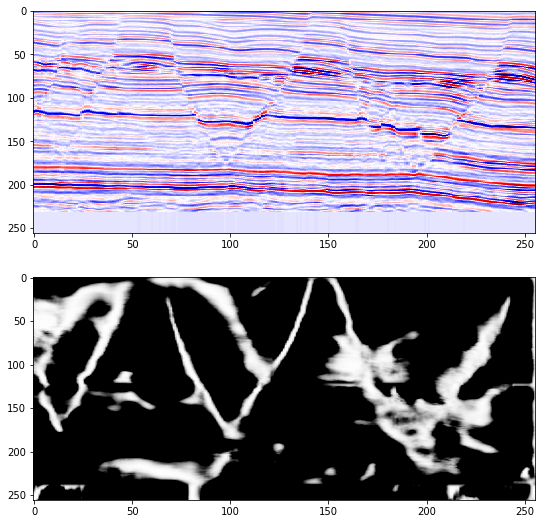

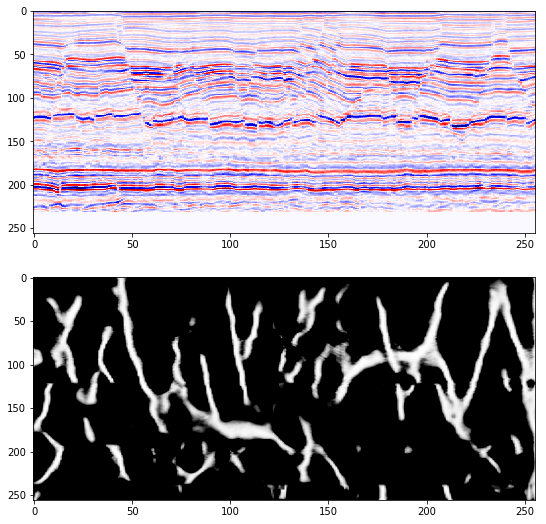

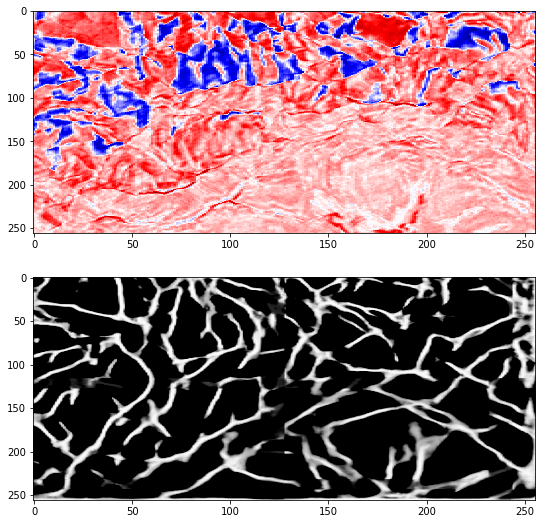

In [9]:
from keras.models import model_from_json
from faultseg3d_test import extract_cube_from_segy, faultseg_run, faultseg_plot_slices

json_file = open('model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("pretrained_model.hdf5")
print("Loaded model from disk")

cube = extract_cube_from_segy('../../unlabelled_segy_data/Thebe_small2', 256)
input_dat_path = "Thebe_small2.dat"
cube.tofile(input_dat_path)
output_dat_path = "Thebe_small2_pred.dat"
dimensions = (256, 256, 256)
faultseg_run(input_dat_path, output_dat_path, loaded_model, *dimensions)
_, _ = faultseg_plot_slices(input_dat_path, output_dat_path, 100, 100, 120, 256, 256, 256)